In [242]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import time
from datetime import datetime 
import scipy.stats as stats
import statsmodels.api as sm
from pandas import ExcelFile
from pandas import ExcelWriter
%matplotlib inline 

In [243]:
covid  = pd.read_excel(r'C:\Users\Muskaan Ratra\Desktop\Raw_data.xlsx')

In [244]:
X = covid.iloc[:, :-1] #Take all the columns except last one
y = covid.iloc[:, -1] #Take the last column as the result  

In [245]:
#Covid-19 Dataset
covid.head()

,Patient Number,State Patient Number,Date Announced,Age Bracket,Gender,Detected City,Detected District,Detected State,Current Status,Notes,Contracted from which Patient (Suspected),Nationality,Type of transmission,Status Change Date,Source_1,Source_2,Source_3,Backup Notes
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,KL-TS-P1,30/01/2020,20,F,Thrissur,Thrissur,Kerala,Recovered,Travelled from Wuhan,NaN,India,Imported,14/02/2020,https://twitter.com/vijayanpinarayi/status/122...,https://weather.com/en-IN/india/news/news/2020...,NaN,Student from Wuhan
2,2.0,KL-AL-P1,2020-02-02 00:00:00,NaN,NaN,Alappuzha,Alappuzha,Kerala,Recovered,Travelled from Wuhan,NaN,India,Imported,14/02/2020,https://www.indiatoday.in/india/story/kerala-r...,https://weather.com/en-IN/india/news/news/2020...,NaN,Student from Wuhan
3,3.0,KL-KS-P1,2020-03-02 00:00:00,NaN,NaN,Kasaragod,Kasaragod,Kerala,Recovered,Travelled from Wuhan,NaN,India,Imported,14/02/2020,https://www.indiatoday.in/india/story/kerala-n...,https://twitter.com/ANI/status/122422148580539...,https://weather.com/en-IN/india/news/news/2020...,Student from Wuhan
4,4.0,DL-P1,2020-02-03 00:00:00,45,M,East Delhi (Mayur Vihar),East Delhi,Delhi,Recovered,"Travelled from Austria, Italy",NaN,India,Imported,15/03/2020,https://www.indiatoday.in/india/story/not-a-ja...,https://economictimes.indiatimes.com/news/poli...,NaN,Travel history to Italy and Austria


In [246]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2475 entries, 0 to 2474
Data columns (total 18 columns):
Patient Number                               2474 non-null float64
State Patient Number                         442 non-null object
Date Announced                               2474 non-null object
Age Bracket                                  729 non-null object
Gender                                       886 non-null object
Detected City                                797 non-null object
Detected District                            1868 non-null object
Detected State                               2474 non-null object
Current Status                               2474 non-null object
Notes                                        2172 non-null object
Contracted from which Patient (Suspected)    678 non-null object
Nationality                                  425 non-null object
Type of transmission                         1736 non-null object
Status Change Date                      

In [247]:
covid.columns

Index(['Patient Number', 'State Patient Number', 'Date Announced',
       'Age Bracket', 'Gender', 'Detected City', 'Detected District',
       'Detected State', 'Current Status', 'Notes',
       'Contracted from which Patient (Suspected)', 'Nationality',
       'Type of transmission', 'Status Change Date', 'Source_1', 'Source_2',
       'Source_3', 'Backup Notes'],
      dtype='object')

In [248]:
covid.describe()

,Patient Number
count,2474.000000
mean,1237.500000
std,714.326606
min,1.000000
25%,619.250000
50%,1237.500000
75%,1855.750000
max,2474.000000


In [249]:
#Data Preprocessing
#identify missing values
covid.isnull().sum()

Patient Number                                  1
State Patient Number                         2033
Date Announced                                  1
Age Bracket                                  1746
Gender                                       1589
Detected City                                1678
Detected District                             607
Detected State                                  1
Current Status                                  1
Notes                                         303
Contracted from which Patient (Suspected)    1797
Nationality                                  2050
Type of transmission                          739
Status Change Date                              4
Source_1                                       12
Source_2                                     1563
Source_3                                     2325
Backup Notes                                 2114
dtype: int64

In [250]:
covid['Date Announced'].value_counts()

2020-01-04 00:00:00    424
2020-02-04 00:00:00    415
31/03/2020             288
30/03/2020             208
27/03/2020             151
28/03/2020             143
29/03/2020             110
23/03/2020             102
25/03/2020              86
26/03/2020              78
21/03/2020              76
22/03/2020              69
24/03/2020              66
20/03/2020              59
19/03/2020              28
18/03/2020              25
2020-04-03 00:00:00     22
17/03/2020              19
14/03/2020              16
2020-10-03 00:00:00     15
16/03/2020              14
2020-12-03 00:00:00     12
13/03/2020               9
2020-09-03 00:00:00      9
2020-11-03 00:00:00      7
15/03/2020               6
2020-08-03 00:00:00      5
2020-07-03 00:00:00      3
2020-05-03 00:00:00      2
2020-02-03 00:00:00      2
2020-03-03 00:00:00      1
30/01/2020               1
2020-03-02 00:00:00      1
2020-02-02 00:00:00      1
2020-06-03 00:00:00      1
Name: Date Announced, dtype: int64

In [251]:
covid['Date Announced'].replace(np.nan,'2020-01-04',inplace=True)

In [252]:
covid['Age Bracket'].value_counts()

21       26
35       24
55       24
40       22
32       22
45       22
24       21
27       21
65       21
23       20
25       19
38       18
22       18
52       17
26       17
33       16
34       16
39       14
41       14
63       14
50       14
37       13
42       13
20       13
48       12
60       12
36       12
53       11
49       11
47       11
         ..
19        5
3         5
1         5
66        5
28-35     4
17        3
62        3
74        3
75        3
76        3
81        2
11        2
85        2
7         2
2         2
13        2
9         1
12        1
6         1
92        1
10        1
96        1
14        1
15        1
78        1
77        1
73        1
72        1
71        1
89        1
Name: Age Bracket, Length: 80, dtype: int64

In [253]:
covid['Age Bracket'].replace(np.nan,'21',inplace=True)

In [254]:
covid['Gender'].value_counts()

M    659
F    227
Name: Gender, dtype: int64

In [340]:
covid['Gender'].replace(np.nan,'M',inplace=True)

In [256]:
covid['Detected City'].value_counts()

Mumbai                      67
Bengaluru                   44
Kasaragod                   26
Pune                        25
Nizamuddin area             24
Hyderabad                   23
Mettupalayam                20
Bhilwara                    18
Ahmedabad                   17
Perundurai                  17
Gurugram                    17
Noida                       15
Bodi                        13
Jaipur                      11
Vadodara                     9
Indore                       9
Sangli                       9
Agra                         9
Kochi                        9
Chennai                      8
Jabalpur                     8
Delhi                        7
Rajkot                       7
Lucknow                      7
Ramganj                      7
Chandigarh                   7
Chirala                      7
Ranni                        7
Bhatkal                      7
Gandhinagar                  7
                            ..
East Delhi (Mayur Vihar)     1
Walajape

In [257]:
covid['Detected City'].replace(np.nan,'Mumbai',inplace=True)

In [258]:
covid['Detected District'].value_counts()

Mumbai                       198
Kasaragod                    129
Indore                        63
Pune                          61
Chennai                       49
Kannur                        48
Bengaluru                     47
Jaipur                        42
Hyderabad                     36
Gautam Buddha Nagar           34
Coimbatore                    33
Ahmadabad                     31
Tirunelveli                   30
Erode                         27
South Delhi                   26
Sangli                        25
Gurugram                      24
Ernakulam                     23
Bhilwara                      22
Theni                         20
Shahid Bhagat Singh Nagar     19
Mysuru                        19
Namakkal                      18
Dindigul                      17
Karur                         17
Srinagar                      17
Ahmadnagar                    17
Chandigarh                    16
Y.S.R.                        16
Jodhpur                       15
          

In [259]:
covid['Detected District'].replace(np.nan,'Mumbai',inplace=True)

In [260]:
covid['Detected State'].value_counts()

Maharashtra                    416
Tamil Nadu                     309
Delhi                          293
Kerala                         286
Andhra Pradesh                 143
Rajasthan                      133
Telangana                      127
Uttar Pradesh                  121
Karnataka                      121
Madhya Pradesh                 100
Gujarat                         87
Jammu and Kashmir               70
West Bengal                     53
Haryana                         49
Punjab                          47
Bihar                           24
Chandigarh                      18
Assam                           16
Ladakh                          13
Andaman and Nicobar Islands     10
Chhattisgarh                     9
Uttarakhand                      7
Goa                              5
Odisha                           5
Himachal Pradesh                 3
Puducherry                       3
Jharkhand                        2
Manipur                          2
Arunachal Pradesh   

In [261]:
covid['Detected State'].replace(np.nan,'Maharashtra',inplace=True)

In [262]:
covid['Current Status'].value_counts()

Hospitalized    2382
Recovered         69
Deceased          22
Migrated           1
Name: Current Status, dtype: int64

In [263]:
covid['Current Status'].replace(np.nan,'Hospitalized',inplace=True)

In [264]:
covid['Contracted from which Patient (Suspected)'].value_counts()

E0               372
P182              16
P6                16
P689              15
P301              13
P764              11
E1                11
P531              10
P171               8
P4                 7
P502               7
P285               7
P108               6
P172               6
P681               5
P389               5
P1131              5
P295               5
P269               4
P35                4
P260               4
P983               4
P117               4
P272               4
P36, P37, P38      4
P385               4
P596               4
P200               3
P142               3
P493               3
                ... 
P630               1
P758               1
P1007              1
P757               1
P753               1
P362               1
P632               1
P157               1
P922               1
P577               1
P469               1
P159               1
P138               1
P22                1
P29                1
P30                1
P525         

In [265]:
covid['Contracted from which Patient (Suspected)'].replace(np.nan,'E0',inplace=True)

In [266]:
covid['Nationality'].value_counts()

India                       368
Italy                        18
Indonesia                    15
Indian                       10
United Kingdom                7
Thailand                      2
Phillipines                   2
Canada                        1
Myanmar                       1
United States of America      1
Name: Nationality, dtype: int64

In [267]:
covid['Nationality'].replace(np.nan,'India',inplace=True)

In [268]:
covid['Type of transmission'].value_counts()

TBD         804
Imported    520
Local       412
Name: Type of transmission, dtype: int64

In [269]:
covid['Type of transmission'].replace(np.nan,'TBD',inplace=True)

In [270]:
covid['Status Change Date'].value_counts()

2020-01-04 00:00:00    432
2020-02-04 00:00:00    417
31/03/2020             288
30/03/2020             208
27/03/2020             170
28/03/2020             151
29/03/2020             126
23/03/2020             103
25/03/2020              89
21/03/2020              71
22/03/2020              69
26/03/2020              68
24/03/2020              67
20/03/2020              58
19/03/2020              26
18/03/2020              25
17/03/2020              17
14/03/2020              16
16/03/2020              12
2020-04-03 00:00:00     10
2020-12-03 00:00:00      8
13/03/2020               6
2020-11-03 00:00:00      6
2020-10-03 00:00:00      6
15/03/2020               6
2020-09-03 00:00:00      5
2020-07-03 00:00:00      3
14/02/2020               3
2020-05-03 00:00:00      2
2020-03-03 00:00:00      1
2020-01-03 00:00:00      1
2020-02-03 00:00:00      1
Name: Status Change Date, dtype: int64

In [271]:
covid['Status Change Date'].replace(np.nan,'2020-01-04',inplace=True)

In [272]:
#identify missing values
covid.isnull().sum() 

Patient Number                                  1
State Patient Number                         2033
Date Announced                                  0
Age Bracket                                     0
Gender                                       1589
Detected City                                   0
Detected District                               0
Detected State                                  0
Current Status                                  0
Notes                                         303
Contracted from which Patient (Suspected)       0
Nationality                                     0
Type of transmission                            0
Status Change Date                              0
Source_1                                       12
Source_2                                     1563
Source_3                                     2325
Backup Notes                                 2114
dtype: int64

In [273]:
duplicates = covid.duplicated()
covid[duplicates].sum()                  #no duplicates

Patient Number                               0.0
State Patient Number                         0.0
Date Announced                               0.0
Age Bracket                                  0.0
Gender                                       0.0
Detected City                                0.0
Detected District                            0.0
Detected State                               0.0
Current Status                               0.0
Notes                                        0.0
Contracted from which Patient (Suspected)    0.0
Nationality                                  0.0
Type of transmission                         0.0
Status Change Date                           0.0
Source_1                                     0.0
Source_2                                     0.0
Source_3                                     0.0
Backup Notes                                 0.0
dtype: float64

In [275]:
from sklearn.impute import SimpleImputer
imr = SimpleImputer(strategy="constant")

In [276]:
imr = imr.fit(covid.values)

In [277]:
imputed_data = imr.transform(covid.values)

In [278]:
imputed_data

array([['missing_value', 'missing_value', '2020-01-04', ...,
        'missing_value', 'missing_value', 'missing_value'],
       [1.0, 'KL-TS-P1', '30/01/2020', ...,
        'https://weather.com/en-IN/india/news/news/2020-02-14-kerala-defeats-coronavirus-indias-three-covid-19-patients-successfully',
        'missing_value', 'Student from Wuhan'],
       [2.0, 'KL-AL-P1', datetime.datetime(2020, 2, 2, 0, 0), ...,
        'https://weather.com/en-IN/india/news/news/2020-02-14-kerala-defeats-coronavirus-indias-three-covid-19-patients-successfully',
        'missing_value', 'Student from Wuhan'],
       ...,
       [2472.0, 'missing_value', datetime.datetime(2020, 2, 4, 0, 0),
        ..., 'missing_value', 'missing_value', 'missing_value'],
       [2473.0, 'missing_value', datetime.datetime(2020, 2, 4, 0, 0),
        ..., 'missing_value', 'missing_value', 'missing_value'],
       [2474.0, 'missing_value', datetime.datetime(2020, 2, 4, 0, 0),
        ..., 'missing_value', 'missing_value', 'mi

In [279]:
covid

,Patient Number,State Patient Number,Date Announced,Age Bracket,Gender,Detected City,Detected District,Detected State,Current Status,Notes,Contracted from which Patient (Suspected),Nationality,Type of transmission,Status Change Date,Source_1,Source_2,Source_3,Backup Notes
0,NaN,NaN,2020-01-04,21,NaN,Mumbai,Mumbai,Maharashtra,Hospitalized,NaN,E0,India,TBD,2020-01-04,NaN,NaN,NaN,NaN
1,1.0,KL-TS-P1,30/01/2020,20,F,Thrissur,Thrissur,Kerala,Recovered,Travelled from Wuhan,E0,India,Imported,14/02/2020,https://twitter.com/vijayanpinarayi/status/122...,https://weather.com/en-IN/india/news/news/2020...,NaN,Student from Wuhan
2,2.0,KL-AL-P1,2020-02-02 00:00:00,21,NaN,Alappuzha,Alappuzha,Kerala,Recovered,Travelled from Wuhan,E0,India,Imported,14/02/2020,https://www.indiatoday.in/india/story/kerala-r...,https://weather.com/en-IN/india/news/news/2020...,NaN,Student from Wuhan
3,3.0,KL-KS-P1,2020-03-02 00:00:00,21,NaN,Kasaragod,Kasaragod,Kerala,Recovered,Travelled from Wuhan,E0,India,Imported,14/02/2020,https://www.indiatoday.in/india/story/kerala-n...,https://twitter.com/ANI/status/122422148580539...,https://weather.com/en-IN/india/news/news/2020...,Student from Wuhan
4,4.0,DL-P1,2020-02-03 00:00:00,45,M,East Delhi (Mayur Vihar),East Delhi,Delhi,Recovered,"Travelled from Austria, Italy",E0,India,Imported,15/03/2020,https://www.indiatoday.in/india/story/not-a-ja...,https://economictimes.indiatimes.com/news/poli...,NaN,Travel history to Italy and Austria
5,5.0,TS-P1,2020-02-03 00:00:00,24,M,Hyderabad,Hyderabad,Telangana,Recovered,"Travelled from Dubai to Bangalore on 20th Feb,...",E0,India,Imported,2020-02-03 00:00:00,https://www.deccanherald.com/national/south/qu...,https://www.indiatoday.in/india/story/coronavi...,https://www.thehindu.com/news/national/coronav...,"Travel history to Dubai, Singapore contact"
6,6.0,NaN,2020-03-03 00:00:00,69,M,Jaipur,Jaipur,Rajasthan,Recovered,Travelled from Italy,E0,Italy,Imported,2020-03-03 00:00:00,https://indianexpress.com/article/india/corona...,https://economictimes.indiatimes.com/news/poli...,https://twitter.com/PTI_News/status/1240878975...,Italian tourist
7,7.0,NaN,2020-04-03 00:00:00,55,NaN,Gurugram,Gurugram,Haryana,Recovered,Travelled from Italy,P6,Italy,Imported,29/03/2020,https://indianexpress.com/article/india/corona...,https://www.indiatoday.in/india/story/coronavi...,NaN,Italian tourist
8,8.0,NaN,2020-04-03 00:00:00,55,NaN,Gurugram,Gurugram,Haryana,Recovered,Travelled from Italy,P6,Italy,Imported,29/03/2020,https://indianexpress.com/article/india/corona...,https://www.indiatoday.in/india/story/coronavi...,NaN,Italian tourist
9,9.0,NaN,2020-04-03 00:00:00,55,NaN,Gurugram,Gurugram,Haryana,Recovered,Travelled from Italy,P6,Italy,Imported,29/03/2020,https://indianexpress.com/article/india/corona...,https://www.indiatoday.in/india/story/coronavi...,NaN,Italian tourist


In [280]:
X = covid.iloc[:, :-1] 
y = covid.iloc[:, -1] 
print(X)
print(y)

      Patient Number State Patient Number       Date Announced Age Bracket  \
0                NaN                  NaN           2020-01-04          21   
1                1.0             KL-TS-P1           30/01/2020          20   
2                2.0             KL-AL-P1  2020-02-02 00:00:00          21   
3                3.0             KL-KS-P1  2020-03-02 00:00:00          21   
4                4.0                DL-P1  2020-02-03 00:00:00          45   
5                5.0                TS-P1  2020-02-03 00:00:00          24   
6                6.0                  NaN  2020-03-03 00:00:00          69   
7                7.0                  NaN  2020-04-03 00:00:00          55   
8                8.0                  NaN  2020-04-03 00:00:00          55   
9                9.0                  NaN  2020-04-03 00:00:00          55   
10              10.0                  NaN  2020-04-03 00:00:00          55   
11              11.0                  NaN  2020-04-03 00:00:00  

In [281]:
from sklearn.impute import SimpleImputer
import numpy as np
imputer = SimpleImputer(missing_values=np.nan, strategy='constant')
imputer = imputer.fit(X.iloc[:, 1:])
X.iloc[:, 1:] = imputer.transform(X.iloc[:, 1:])

In [282]:
X

,Patient Number,State Patient Number,Date Announced,Age Bracket,Gender,Detected City,Detected District,Detected State,Current Status,Notes,Contracted from which Patient (Suspected),Nationality,Type of transmission,Status Change Date,Source_1,Source_2,Source_3
0,NaN,missing_value,2020-01-04,21,missing_value,Mumbai,Mumbai,Maharashtra,Hospitalized,missing_value,E0,India,TBD,2020-01-04,missing_value,missing_value,missing_value
1,1.0,KL-TS-P1,30/01/2020,20,F,Thrissur,Thrissur,Kerala,Recovered,Travelled from Wuhan,E0,India,Imported,14/02/2020,https://twitter.com/vijayanpinarayi/status/122...,https://weather.com/en-IN/india/news/news/2020...,missing_value
2,2.0,KL-AL-P1,2020-02-02 00:00:00,21,missing_value,Alappuzha,Alappuzha,Kerala,Recovered,Travelled from Wuhan,E0,India,Imported,14/02/2020,https://www.indiatoday.in/india/story/kerala-r...,https://weather.com/en-IN/india/news/news/2020...,missing_value
3,3.0,KL-KS-P1,2020-03-02 00:00:00,21,missing_value,Kasaragod,Kasaragod,Kerala,Recovered,Travelled from Wuhan,E0,India,Imported,14/02/2020,https://www.indiatoday.in/india/story/kerala-n...,https://twitter.com/ANI/status/122422148580539...,https://weather.com/en-IN/india/news/news/2020...
4,4.0,DL-P1,2020-02-03 00:00:00,45,M,East Delhi (Mayur Vihar),East Delhi,Delhi,Recovered,"Travelled from Austria, Italy",E0,India,Imported,15/03/2020,https://www.indiatoday.in/india/story/not-a-ja...,https://economictimes.indiatimes.com/news/poli...,missing_value
5,5.0,TS-P1,2020-02-03 00:00:00,24,M,Hyderabad,Hyderabad,Telangana,Recovered,"Travelled from Dubai to Bangalore on 20th Feb,...",E0,India,Imported,2020-02-03 00:00:00,https://www.deccanherald.com/national/south/qu...,https://www.indiatoday.in/india/story/coronavi...,https://www.thehindu.com/news/national/coronav...
6,6.0,missing_value,2020-03-03 00:00:00,69,M,Jaipur,Jaipur,Rajasthan,Recovered,Travelled from Italy,E0,Italy,Imported,2020-03-03 00:00:00,https://indianexpress.com/article/india/corona...,https://economictimes.indiatimes.com/news/poli...,https://twitter.com/PTI_News/status/1240878975...
7,7.0,missing_value,2020-04-03 00:00:00,55,missing_value,Gurugram,Gurugram,Haryana,Recovered,Travelled from Italy,P6,Italy,Imported,29/03/2020,https://indianexpress.com/article/india/corona...,https://www.indiatoday.in/india/story/coronavi...,missing_value
8,8.0,missing_value,2020-04-03 00:00:00,55,missing_value,Gurugram,Gurugram,Haryana,Recovered,Travelled from Italy,P6,Italy,Imported,29/03/2020,https://indianexpress.com/article/india/corona...,https://www.indiatoday.in/india/story/coronavi...,missing_value
9,9.0,missing_value,2020-04-03 00:00:00,55,missing_value,Gurugram,Gurugram,Haryana,Recovered,Travelled from Italy,P6,Italy,Imported,29/03/2020,https://indianexpress.com/article/india/corona...,https://www.indiatoday.in/india/story/coronavi...,missing_value


In [284]:
covid.tail()

,Patient Number,State Patient Number,Date Announced,Age Bracket,Gender,Detected City,Detected District,Detected State,Current Status,Notes,Contracted from which Patient (Suspected),Nationality,Type of transmission,Status Change Date,Source_1,Source_2,Source_3,Backup Notes
2470,2470.0,NaN,2020-02-04 00:00:00,21,NaN,Mumbai,Mumbai,Delhi,Hospitalized,NaN,E0,India,TBD,2020-02-04 00:00:00,https://twitter.com/ANI/status/124572782601742...,NaN,NaN,NaN
2471,2471.0,NaN,2020-02-04 00:00:00,21,NaN,Mumbai,Mumbai,Delhi,Hospitalized,NaN,E0,India,TBD,2020-02-04 00:00:00,https://twitter.com/ANI/status/124572782601742...,NaN,NaN,NaN
2472,2472.0,NaN,2020-02-04 00:00:00,21,NaN,Mumbai,Mumbai,Delhi,Hospitalized,NaN,E0,India,TBD,2020-02-04 00:00:00,https://twitter.com/ANI/status/124572782601742...,NaN,NaN,NaN
2473,2473.0,NaN,2020-02-04 00:00:00,21,NaN,Mumbai,Mumbai,Delhi,Hospitalized,NaN,E0,India,TBD,2020-02-04 00:00:00,https://twitter.com/ANI/status/124572782601742...,NaN,NaN,NaN
2474,2474.0,NaN,2020-02-04 00:00:00,21,NaN,Mumbai,Mumbai,Delhi,Hospitalized,NaN,E0,India,TBD,2020-02-04 00:00:00,https://twitter.com/ANI/status/124572782601742...,NaN,NaN,NaN


In [288]:
covid.shape

(2475, 18)

In [294]:
covid_latest = covid[covid['Date Announced']=="16/03/2020"]
covid_latest.head()

,Patient Number,State Patient Number,Date Announced,Age Bracket,Gender,Detected City,Detected District,Detected State,Current Status,Notes,Contracted from which Patient (Suspected),Nationality,Type of transmission,Status Change Date,Source_1,Source_2,Source_3,Backup Notes
114,114.0,NaN,16/03/2020,21,NaN,Rajouri,Jammu,Jammu and Kashmir,Hospitalized,Travelled from Saudi,E0,India,Imported,16/03/2020,https://twitter.com/kansalrohit69,https://twitter.com/ANI/status/123959741864090...,NaN,Travel history to Saudi Arabia
115,115.0,KA-P8,16/03/2020,32,M,Bengaluru,Bengaluru,Karnataka,Recovered,"Travelled from US via London on March 8, Co Pa...",E0,India,Imported,16/03/2020,https://twitter.com/ANI/status/123954677388385...,NaN,NaN,"Returned from the US via London on March 8, Co..."
116,116.0,KA-P7,16/03/2020,45,F,Kalaburagi,Kalaburagi,Karnataka,Recovered,Daughter of P74,P74,India,Local,16/03/2020,https://www.thehindu.com/news/national/karnata...,NaN,NaN,Daughter of P74
117,117.0,KL-KS-P2,16/03/2020,21,NaN,Kalanadu,Kasaragod,Kerala,Hospitalized,Travelled from Middle East,E0,India,Imported,16/03/2020,https://english.manoramaonline.com/news/kerala...,https://www.thehindu.com/news/national/kerala/...,NaN,Returned from Middle East
118,118.0,KL-MLP-1,16/03/2020,21,F,Malappuram,Malappuram,Kerala,Recovered,Travelled from Middle East,E0,India,Imported,2020-02-04 00:00:00,https://english.manoramaonline.com/news/kerala...,http://dhs.kerala.gov.in/wp-content/uploads/20...,https://www.mathrubhumi.com/news/kerala/two-co...,Returned from Middle East


In [303]:
covid.iloc[0]

Patient Number                                        NaN
State Patient Number                                  NaN
Date Announced                                 2020-01-04
Age Bracket                                            21
Gender                                                NaN
Detected City                                      Mumbai
Detected District                                  Mumbai
Detected State                                Maharashtra
Current Status                               Hospitalized
Notes                                                 NaN
Contracted from which Patient (Suspected)              E0
Nationality                                         India
Type of transmission                                  TBD
Status Change Date                             2020-01-04
Source_1                                              NaN
Source_2                                              NaN
Source_3                                              NaN
Backup Notes  

In [305]:
individuals_grouped_district = covid.groupby('Detected District')
individuals_grouped_district = individuals_grouped_district['Date Announced']
individuals_grouped_district.columns = ['count']
individuals_grouped_district.count().sort_values(ascending=False).head()

Detected District
Mumbai       805
Kasaragod    129
Indore        63
Pune          61
Chennai       49
Name: Date Announced, dtype: int64

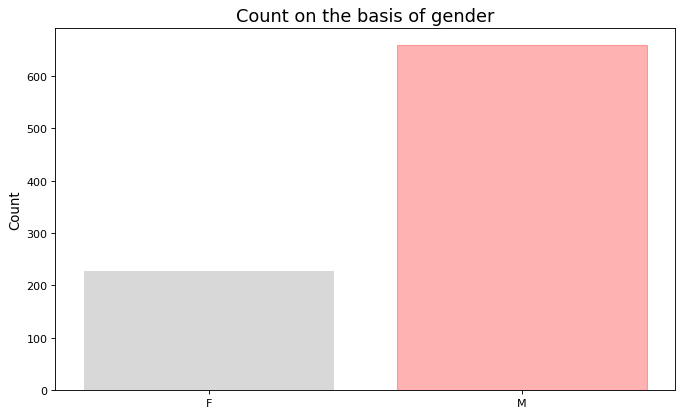

In [307]:
individuals_grouped_gender = covid.groupby('Gender')
individuals_grouped_gender = pd.DataFrame(individuals_grouped_gender.size().reset_index(name = "count"))
individuals_grouped_gender.head()

plt.figure(figsize=(10,6), dpi=80)
barlist = plt.bar(individuals_grouped_gender['Gender'], individuals_grouped_gender['count'], align = 'center', color='grey', alpha=0.3)
barlist[1].set_color('r')
plt.ylabel('Count', size=12)
plt.title('Count on the basis of gender', size=16)
plt.show()

In [310]:
individuals_grouped_date.tail()

,Date Announced,count
31,28/03/2020,143
32,29/03/2020,110
33,30/01/2020,1
34,30/03/2020,208
35,31/03/2020,288
